## **Perceptron Tutorial.**

Ricardo Ernesto Hernández Orozco
Este notebook explica los fundamentos del Perceptrón, su modelo matemático y muestra una implementación práctica en Python usando `scikit-learn`. Debe poder ejecutarse en Jupyter o Google Colab sin modificaciones.

---




1.1 Fundamentos de la técnica


El *Perceptrón* es un algoritmo de clasificación lineal binaria propuesto por Frank Rosenblatt (1958). Busca una frontera lineal que separe dos clases en el espacio de características. Es un clasificador sencillo basado en una unidad lineal seguida por una función de signo (o escalón). Es la base de redes neuronales más complejas.


Ventajas: simple, rápido, fácil de interpretar.
Limitaciones: solo separa clases linealmente separables; no maneja bien ruido o relaciones no lineales sin transformar características.

1.2  Modelo Matemático del Perceptrón.
Sea $\mathbf{x} = (x_1, x_2, \dots, x_n)$ el vector de entrada y $\mathbf{w} = (w_1, w_2, \dots, w_n)$ el vector de pesos con sesgo $b$. El perceptrón calcula la salida:


$$z = \mathbf{w}^T \mathbf{x} + b$$


La regla de decisión (función de activación escalón) es:


$$y = \begin{cases} 1 & \text{si } z \ge 0 \\ -1 & \text{si } z < 0 \end{cases}$$


Durante el entrenamiento (regla del perceptrón) para cada ejemplo $\mathbf{x}^{(i)}$ con etiqueta $t^{(i)} \in \{-1, +1\}$ si la predicción es incorrecta se actualizan los pesos:


$$\mathbf{w} \leftarrow \mathbf{w} + \eta \, t^{(i)} \mathbf{x}^{(i)}$$
$$b \leftarrow b + \eta \, t^{(i)}$$


donde $\eta$ es la tasa de aprendizaje. Bajo condiciones de separabilidad lineal el algoritmo converge.

1.3 Librerías, clases y funciones empleadas (Python / scikit-learn)


A continuación la descripción breve de las principales librerías y clases que usaremos:


- `numpy`: manipulación numérica y vectores.
- `pandas`: manejo de datos tabulares (opcionalmente para inspección).
- `matplotlib.pyplot`: visualizaciones.
- `sklearn.datasets.load_iris`: cargador de dataset (usaremos la porción binaria para ejemplo).
- `sklearn.model_selection.train_test_split`: dividir datos en entrenamiento/prueba.
- `sklearn.preprocessing.StandardScaler`: estandarización de características (importante para perceptrón).
- `sklearn.linear_model.Perceptron`: implementación del perceptrón en scikit-learn.
- `sklearn.pipeline.Pipeline`: para encadenar transformaciones y el modelo.
- `sklearn.metrics.accuracy_score`, `classification_report`, `confusion_matrix`: evaluación del modelo.

1.4 Pipeline
Feature Engineering


Describiremos las variables usadas (señales) y prepararemos los datos.


Para este tutorial usamos el dataset Iris pero convertiremos el problema a binario (p. ej. distinguir `Iris-setosa` vs `no-setosa`) para encajar con el Perceptrón clásico.


Variables que usaremos (columnas del dataset Iris):
- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`


Explicación: estas son medidas morfológicas; como perceptrón es un clasificador lineal, usaremos las características sin generación de polinomios (para mantenerlo lineal). En problemas reales, podríamos agregar interacciones o transformaciones si la separación no es lineal.


In [7]:
# carga y preparación de datos
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Cargar Iris
iris = datasets.load_iris()
X = iris.data # 4 features
y = iris.target


# Transformar a problema binario: setosa (0) vs no-setosa (1)
# Etiquetas: +1 para setosa, -1 para no-setosa (seguimos la convención de perceptrón)
y_binary = np.where(y == 0, 1, -1)


# Crear DataFrame para inspección
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y_binary


print('Tamaño dataset:', df.shape)
print(df.head())


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42, stratify=y_binary)
print('\nDistribución en entrenamiento:', np.bincount(np.where(y_train==1,1,0)), ' (setosa count, no-setosa count)')

Tamaño dataset: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Distribución en entrenamiento: [70 35]  (setosa count, no-setosa count)


Model Selection


**Razones formales para usar un clasificador lineal (Perceptrón):**
- Si las clases son (aproximadamente) separables por una frontera lineal, un clasificador lineal es suficiente y eficiente.
- Baja complejidad: pocos parámetros, entrenamiento rápido y buena interpretabilidad (los pesos muestran importancia de features).
- Buena elección base o referencia antes de probar modelos más complejos.


Nota: si los datos no son linealmente separables, conviene usar transformaciones de features (polinomios, núcleos) o modelos no lineales (SVM con kernel, árboles, redes neuronales).

Model Training


A continuación creamos un pipeline con `StandardScaler` (esencial para el Perceptrón) y `Perceptron` de sklearn y entrenamos (fit).

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron


# Configurar pipeline
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('perceptron', Perceptron(max_iter=1000, tol=1e-3, random_state=42))
])


# Entrenar
pipe.fit(X_train, y_train)
print('Entrenamiento completado')


# Mostrar pesos aprendidos (del perceptrón)
perceptron = pipe.named_steps['perceptron']
print('\nPesos (w):', perceptron.coef_)
print('Sesgo (b):', perceptron.intercept_)

Entrenamiento completado

Pesos (w): [[-1.33764981  1.8454364  -1.50589757 -1.08417336]]
Sesgo (b): [0.]


Prediction
Creamos una función que reciba un patrón de entrada (lista o array con 4 valores) y devuelva la clase predicha y la decisión interna (valor z). Esta función ayudará a probar patrones manuales.

In [15]:
import numpy as np


def predict_pattern(model_pipeline, pattern):
    """
    model_pipeline: pipeline entrenado
    pattern: iterable con 4 valores (sepal length, sepal width, petal length, petal width)
    Retorna: dict con la predicción (+1 = setosa, -1 = no-setosa), y el valor de decisión (antes del escalón)
    """
    x = np.array(pattern).reshape(1, -1)
    # obtenemos el valor transformado por scaler y luego el z manual si queremos
    scaler = model_pipeline.named_steps['scaler']
    percep = model_pipeline.named_steps['perceptron']
    x_scaled = scaler.transform(x)
    z = np.dot(percep.coef_, x_scaled.T) + percep.intercept_
    pred = percep.predict(x_scaled)
    return {'pattern': pattern, 'z': float(z.item()), 'prediction': int(pred[0])}


# Probar con algunos patrones (ejemplos tomados del dataset)
print(predict_pattern(pipe, X_test[0]))
print(predict_pattern(pipe, X_test[1]))

{'pattern': array([5. , 3.4, 1.5, 0.2]), 'z': 6.269849494447843, 'prediction': 1}
{'pattern': array([6.9, 3.1, 5.1, 2.3]), 'z': -4.323324067138398, 'prediction': -1}


Model Evaluation

Calculamos la métrica Accuracy y mostramos la matriz de confusión y el reporte de clasificación.

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Predicciones en el conjunto de prueba
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[1,-1])
report = classification_report(y_test, y_pred, labels=[1,-1], target_names=['setosa','no-setosa'])


print('Accuracy:', acc)
print('\nMatriz de confusión (filas=verdadero, columnas=predicho) \nLabels order: [setosa(1), no-setosa(-1)]')
print(cm)
print('\nReporte de clasificación:\n', report)


# Breve interpretación:
# - Accuracy cercano a 1 indica que el perceptrón separa bien setosa vs no-setosa.
# - Revisar falsos positivos/negativos en la matriz de confusión para conocer tipo de error.

Accuracy: 1.0

Matriz de confusión (filas=verdadero, columnas=predicho) 
Labels order: [setosa(1), no-setosa(-1)]
[[15  0]
 [ 0 30]]

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
   no-setosa       1.00      1.00      1.00        30

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Visualización

Para entender la separación lineal podemos proyectar a 2 dimensiones (por ejemplo, usando las dos primeras features) y visualizar la frontera de decisión.

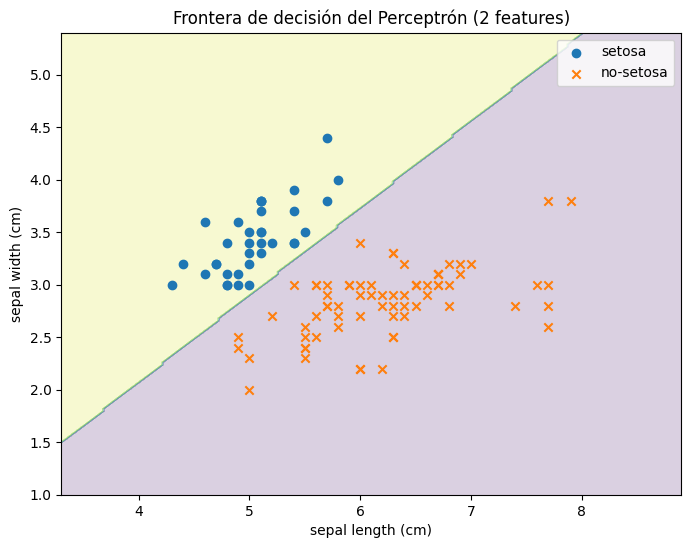

In [11]:
import matplotlib.pyplot as plt


# Elegimos las primeras dos features para visualizar
X_vis = X_train[:, :2]
y_vis = y_train


pipe_vis = Pipeline([
  ('scaler', StandardScaler()),
  ('perceptron', Perceptron(max_iter=1000, tol=1e-3, random_state=42))
])
pipe_vis.fit(X_vis, y_vis)


# Crear rejilla
x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]


Z = pipe_vis.predict(grid).reshape(xx.shape)


plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_vis[y_vis==1,0], X_vis[y_vis==1,1], marker='o', label='setosa')
plt.scatter(X_vis[y_vis==-1,0], X_vis[y_vis==-1,1], marker='x', label='no-setosa')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Frontera de decisión del Perceptrón (2 features)')
plt.legend()
plt.show()

Referencias bibliográficas

Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. *Psychological Review, 65*(6), 386–408.


Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825–2830.


Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.